In [1]:
import anndata
import pandas as pd

import mypackage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
adata = anndata.read('gutenberg_sentences.h5ad')

In [3]:
mypackage.setup_anndata(adata)

INFO      No batch_key inputted, assuming all cells are same batch                           
INFO      No label_key inputted, assuming all cells have same label                          
INFO      Using data from adata.X                                                            
INFO      Computing library size prior per batch                                             
INFO      Successfully registered anndata object containing 36952 cells, 51251 vars, 1       
          batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates  
          and 0 extra continuous covariates.                                                 
INFO      Please do not further modify adata until model is trained.                         


In [4]:
model = mypackage.MyModel(adata)

INFO      mypackage: The model has been initialized                                          


In [5]:
adata

AnnData object with n_obs × n_vars = 36952 × 51251
    obs: 'country', 'sentence', 'book', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var'
    uns: '_scvi'

In [6]:
model.train(max_epochs = 10)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores


Epoch 10/10: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [08:52<00:00, 53.24s/it, loss=347, v_num=1]


(101.77471771240232, 1000.0)

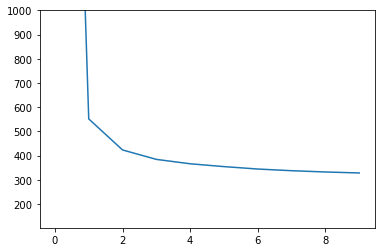

In [12]:
plt.plot(model.history['reconstruction_loss_train'], );
plt.ylim(top = 1000)

In [7]:
latent = model.get_latent_representation()

In [13]:
from openTSNE import TSNE

In [14]:
tsne = TSNE(verbose = True, n_jobs = -1)

In [15]:
yy = tsne.fit(latent)

C:\Users\vale\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


--------------------------------------------------------------------------------
TSNE(callbacks=None, callbacks_every_iters=50, dof=1, early_exaggeration=12,
     early_exaggeration_iter=250, exaggeration=None, final_momentum=0.8,
     initial_momentum=0.5, initialization='pca', ints_in_interval=1,
     learning_rate='auto', max_grad_norm=None, metric='euclidean',
     metric_params=None, min_num_intervals=50, n_components=2,
     n_interpolation_points=3, n_iter=500, n_jobs=-1,
     negative_gradient_method='fft', neighbors=None, perplexity=30,
     random_state=None, theta=0.5, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 6.48 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.47 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.06 seconds
===> Running optimization with exaggeratio

In [16]:
for i, y in enumerate(yy.T):
    adata.obs[f'tsne_{i + 1}'] = y

In [17]:
import plotnine as p

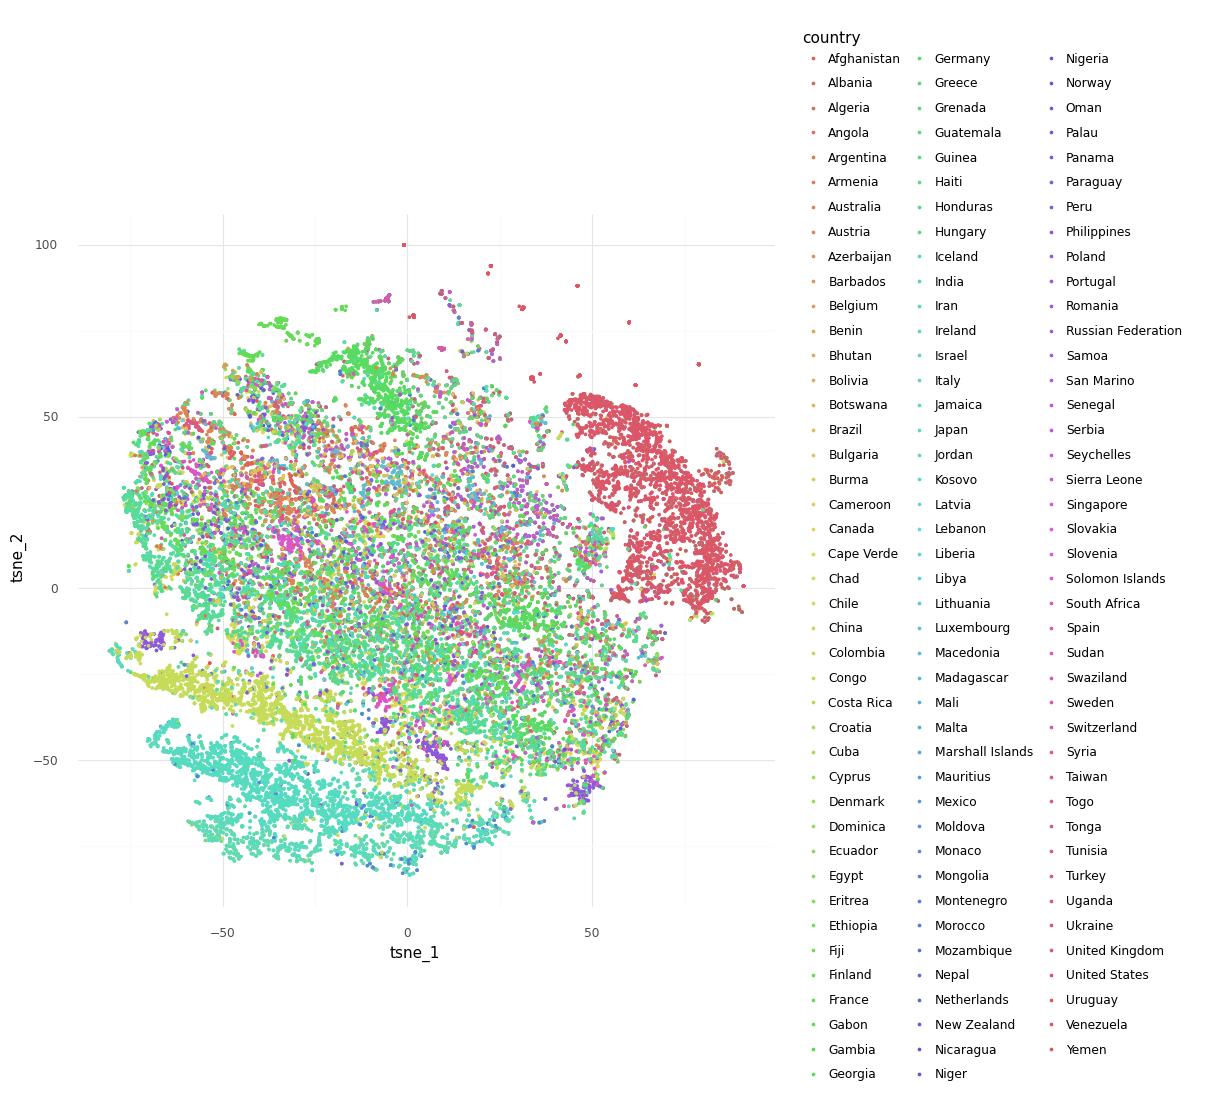

<ggplot: (-9223371863573336580)>

In [18]:
p.options.figure_size = 9, 9
(
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', label = 'country', color = 'country'), adata.obs)
    + p.geom_point(shape = '.')
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(ncol = 3))
)

In [28]:
adata.obs['sum_'] = np.array(adata.X.sum(1))[:, 0]

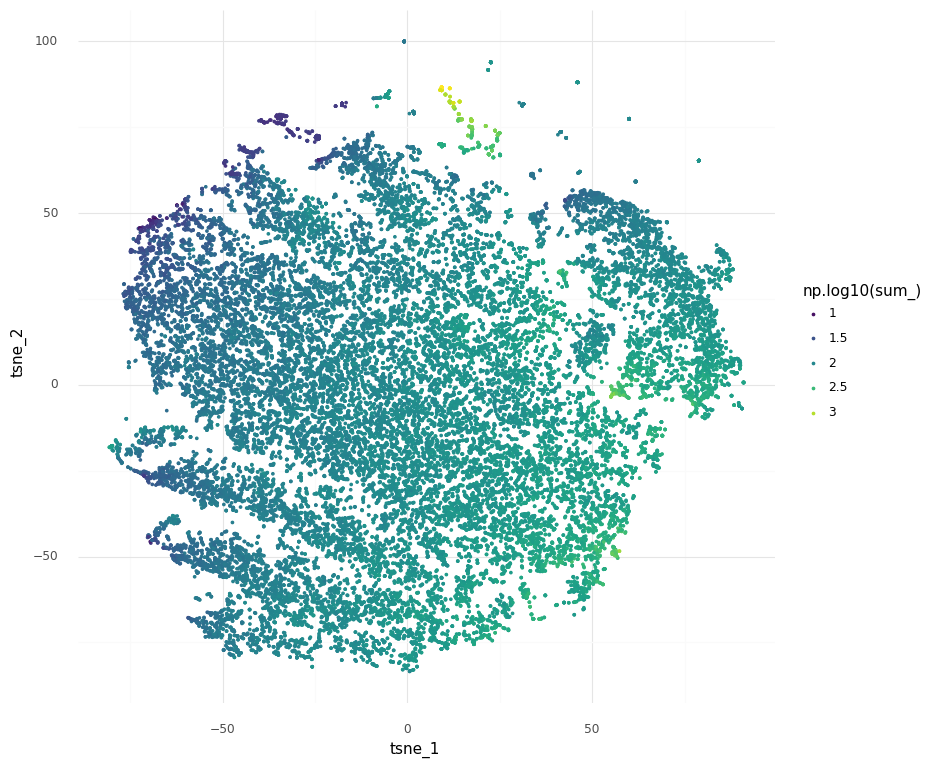

<ggplot: (-9223371863540264068)>

In [37]:
p.options.figure_size = 9, 9
(
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', color = 'np.log10(sum_)'), adata.obs)
    + p.geom_point(shape = '.')
    + p.theme_minimal()
    + p.guides(color = p.guide_legend(ncol = 1))
)

In [36]:
adata.obs.sort_values('sum_', ascending = False).tail(20)

,country,sentence,book,_scvi_batch,_scvi_labels,_scvi_local_l_mean,_scvi_local_l_var,tsne_1,tsne_2,sum_
17598,Austria,See Austria.,gutenbergtxts\1913 The Governments of Europe b...,0,0,4.641522,0.248961,-60.853343,52.652688,13.0
7052,Spain,of Spain.,"gutenbergtxts\1890 Japan and the Pacific, and ...",0,0,4.641522,0.248961,-67.729063,47.616626,13.0
33497,Japan,Not Japan.,gutenbergtxts\1922 Peacemakers—Blessed and Oth...,0,0,4.641522,0.248961,-69.550673,-45.636981,13.0
16198,France,of France.,gutenbergtxts\1913 The Governments of Europe b...,0,0,4.641522,0.248961,-72.233685,45.480855,13.0
23306,France,of France.,gutenbergtxts\1915 The War and Democracy by Gr...,0,0,4.641522,0.248961,-72.233739,45.480861,13.0
17621,Norway,See Norway.,gutenbergtxts\1913 The Governments of Europe b...,0,0,4.641522,0.248961,-68.169119,48.313232,13.0
17617,Norway,See Norway.,gutenbergtxts\1913 The Governments of Europe b...,0,0,4.641522,0.248961,-68.169119,48.313232,13.0
16627,Spain,of Spain.,gutenbergtxts\1913 The Governments of Europe b...,0,0,4.641522,0.248961,-67.724931,47.616679,13.0
1729,Egypt,"Egypt, chap.",gutenbergtxts\1856 First Footsteps in East Afr...,0,0,4.641522,0.248961,-69.363376,46.958256,12.0
17557,Sweden,See Sweden.,gutenbergtxts\1913 The Governments of Europe b...,0,0,4.641522,0.248961,-67.713911,47.971691,12.0


In [35]:
adata.var

""
""
David
DECLARATION
testoath
did
...
AngloIndians
decease
favorite
Albion
